# Exercise Sheet 7
1. Given the following dataset of 8 data points:
$$
A=\{(1,1),(2,1),(4,3),(5,4),(6,5),(7,6),(9,8),(10,7)\}
$$

Apply the k-means algorithm with $k=2$, starting with the initial centroids $C_1=(2,1)$ and $C_2=(10,7)$. Perform two iterations of the algorithm, showing the assignment of data points to clusters and the updated positions of centroids after each iteration.
2. Now, suppose you want to apply the k-means algorithm with $k=3$ to the same dataset. Choose the initial centroids as $C_1=(1,1), C_2=(5,4)$, and $C_3=(9,8)$. Perform two iterations of the algorithm, showing the assignment of data points to clusters and the updated positions of centroids after each iteration.

## Exercise 1
Your task is to (manually) create a Naive Bayes classifier that distinguishes between positive and negative movie reviews.  Your training data consists of the following reviews (already split intoindividual tokens):
\begin{array}{ll}
\hline \text { Positiv } & \text { Negativ } \\
\hline \text { a, great, time } & \text { one, out, of, five } \\
\text { a, great, film } & \text { a, terrible, movie } \\
\text { a, great, movie } & \text { boring, film } \\
\text { amazing, movie } & \text { not, great } \\
\text { not, bad } & \text { not, great, time } \\
\hline
\end{array}

Use Laplacian Smoothing with value 1. Now please classify the following reviews in your test data:
1. not, great, movie
2. a, boring, film

##### Solution:

To classify two novel data points in a Naive Bayes the two following probabilites have to be compared:
$$p(positive|w_{1},w_{2}, ..., w_{d})$$ against $$p(negative|w_{1},w_{2}, ..., w_{d})$$.
Assuming each word is conditionally independent this results in following probability equation:

$$p(class|w_{1},w_{2}, ..., w_{d}) = p(class) * \prod_{i} p(w_{i}|class)$$, where w is the given feature (word) and class is either a positive or negative score.

$p(w_{i}|class)$ is given by $\frac{\text{frequency of } w_{i}}{\text{number of works in class}}$.

Note that when applying Laplacian smoothing each word is added to each sample once to counter probabilities of zeros. This results in the probability equation of:

$$p(w_{i}|class) = \frac{\text{frequency of } w_{i} + 1}{\text{number of words in class + total number of unique words}}$$

The classification of the test data looks as follows:

$p(positive|not, great, movie) = p(positive) * p(not|positive) * p(great| positive) * p(movie|positive)$,
$p(negative|not, great, movie) = p(negative) * p(not|negative) * p(great| negative) * p(movie|negative)$.

Not great movie:
Counting the occurrences of each class and words for each class this is equivalent to:
$p(positive|not, great, movie) = 1/2 * 2/21 * 4/21 * 3/21 = 0.001295$,
$p(negative|not, great, movie) = 1/2 * 3/26 * 3/26 * 1/13 = 0.000512$.

Thus, the sample "Not great movie" is classified as a positive review given our data.

A boring film:
$p(positive|a, boring, film) = 1/2 * 4/21 * 1/21 * 2/21 = 0.000431$,
$p(negative|a, boring, film) = 1/2 * 1/13 * 1/13 * 1/13 = 0.000227$.

Thus, the sample "A boring film" is classified as a positive review given our data.



##### Exercise:

What do you notice about the results? Give a short guess why the results turned out like this. Now assume you would try to use a bigram classifier to enhance the results.

##### Solution
<Despite both samples being perceived as a negative review the Naive classifier predicts them to be positive ones. This is due to the fact that the Naive classifier assumes that each feature is conditionally independent from one another. This removes the context a word gives the other ones. "Not great" has an entirely different meaning when you view it as one feature instead of splitting it. Thus, bigrams might help here since it would give the model more context.
>
"A boring film" was classified as a positive review since the number of words and especially unique words is far larger in the data pool for negative reviews than for positive ones. This results in smaller probabilities of the words occurring in the datapool overall. Whereas the positive datapool consists of 13 words and 8 unique ones the negative datapool contains 14 words with 12 unique words.


##### Exercise:
A bigram classifier uses two neighbouring words as units. This is the training data split in to bigrams. \# denotes an artificial delimiter which allows all words to occur in exactly two bigrams.
\begin{tabular}{ll}
\hline Positiv & Negativ \\
\hline \# a, a great, great time, time \# & \# one, one out, out of, of five, five \# \\
\# a, a great, great film, film \# & \# a, a terrible, terrible movie, movie \# \\
\# a, a great, great movie, movie \# & \# boring, boring film, film \# \\
\# amazing, amazing movie, movie \# & \# not, not great, great \# \\
\# not, not bad, bad \# & \# not, not great, great time, time \# \\
\hline
\end{tabular}

Use the same two test reviews and first split them into bigrams. Then do the classification again using your bigram classifier. Did this solve the problems from the first try? Which new problems do you see? What would happen if you would use arbitrarily large n-grams?

##### Solution:
Sample Bigrams:
not, not great, great movie, movie
a, a boring, boring film, film

Number of bigrams for positive = 18, unique = 13, total = 31
Number of bigrams for negative = 19, unique = 17, total = 36

Not great movie:
$p(positive|not, not great, great movie, movie) = 1/2 * 2/31 * 1/31 * 2/31 * 3/31 = 6.496874461977582e-06$,
$p(negative|not, not great, great movie, movie) = 1/2 * 3/36 * 3/36 * 1/31 * 2/31 = 7.226268932824604e-06$.

Thus, the sample "Not great movie" is classified as a negative review given our data using bigrams.

A boring film:
$p(positive|a, a boring, boring film, film) = 1/2 * 4/31 * 1/31 * 1/31 * 2/31 = 4.331249641318389e-06$,
$p(negative|a, a boring, boring film, film) = 1/2 * 2/36 * 1/36 * 2/36 * 3/36 = 3.572245084590763e-06$.

Thus, the sample "A boring movie" would be still classified as a positive review given our data using bigrams.
However, if we remove the rule that each word can only occur in two bigrams which would make for our test data we receive:
$p(positive| a, a boring, boring, boring film, film) = p(positive|a, a boring, boring film, film) * 1/31 = 1.3971773036510932e-07$
$p(negative| a, a boring, boring, boring film, film) = p(negative|a, a boring, boring film, film) * 2/36 = 1.9845806025504238e-07$

This would actually correctly classify the sample "A boring movie" as a negative review.

Using a big-ram does solve the mis-classification of the samples however the probabilities become increasingly smaller. This is due to the added tokens.




## Exercise 2

In some cases, one wants to include prior knowledge into your classifier. This kind of knowledge is taken from experts or literature, and is particularly helpful if it concerns rare features, problems with sparse training data or knowledge which is not directly reflected in the data.  Can you come up with an example for such prior knowledge? How would you include prior knowledge in a base classifier or in a decision tree? Why is this challenging in practice?

##### Solution
Example:
Assume you want to classify whether a patient has a disease or not based on their symptoms. A doctor might introduce prior knowledge saying that certain symptoms might be rare but are really strong indicators for the disease. To introduce this prior knowledge into a naive classifier one could adjust the likelihood artificially i.e.

Original likelihood: P(symptom A∣Disease)=0.1P(symptom A∣Disease)=0.1

Expert-adjusted likelihood: P(symptom A∣Disease)=0.8P(symptom A∣Disease)=0.8

In Decision trees this can be done by weighing the certain feature (symptom A) to give them more importance when splitting.

Generally incorporating prior knowledge to classifiers is difficult since they are not data based and are thus hard to translate i.e. by how much would you want to increase the probability/weight of the symptoms?


### Exercise 3
Apply a Naive Base classifierto two classification problems. We provide you the datasets20newsgroups.csv and spam_or_not_spam.csv. You can use scikit-learn for this exercise. For both datasets, use the methods of scikit-learnto split the data into training and test date(recomondation: 80% training). You can also find methods to turn the text into a vector representaion using the so-called TF-IDF measure.  TF-IDF helps to identify words that are as distinctive as possible for the respective categories. spam_or_not_spam.csv contains e-mails that should be classified in two categories (spam and not spam). 20newsgroups.csv contains news group texts that should be classified in 20 categories. Your classifier thus should work for an arbitrary number of labels. Please provide Accuracy, Precision, Recall and F1 for both classification tasks. We provide you an additional test dataset test_dataset.csv which you should be able to classifiy with an accuracy of about 0.75.

In [28]:
import pandas as pd

# imports for sklearn

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns

In [30]:
sns.set_style("whitegrid")

In [9]:
def load_text_dataset_pandas(dataset_path):
    """This function loads CSV datasets using the read_csv method of the pandas library.
    The CSV is epxected to be comma-separated, while separate examples are separated by new line.
    First entry is expected to be text, second entry is parsed as classification label."""
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, 0].to_numpy()
    y = df.iloc[:, 1].to_numpy()

    return X, y

In [20]:

def vectorize_text(X_train, X_test):
    # train tf-idf vectorizer
    vectorizer = TfidfVectorizer()
    # transform X_train
    # transform X_test
    V_train = vectorizer.fit_transform(X_train)
    V_test = vectorizer.transform(X_test)
    return V_train, V_test


#### 20newsgroups dataset - multiclass classification

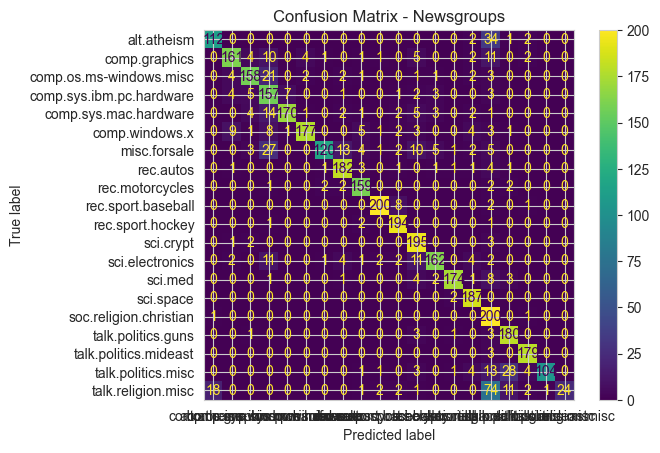

20 Newsgroups Classification Metrics:
Accuracy: 0.8475
Precision: 0.8778
Recall: 0.8475
F1 Score: 0.8421


In [27]:
# Load newsgroups dataset
newsgroups_texts, newsgroups_labels = load_text_dataset_pandas('20newsgroups.csv')

# Train-test split
X_train_newsgroups, X_test_newsgroups, y_train_newsgroups, y_test_newsgroups = train_test_split(newsgroups_texts,
                                                                                                newsgroups_labels,
                                                                                                test_size=0.2,
                                                                                                random_state=42)

# Vectorize data
V_train_newsgroups, V_test_newsgroups = vectorize_text(X_train_newsgroups, X_test_newsgroups)

# Train classifier
clf_newsgroups = MultinomialNB()
clf_newsgroups.fit(V_train_newsgroups, y_train_newsgroups)

# Predict
y_pred_newsgroups = clf_newsgroups.predict(V_test_newsgroups)

# Build confusion matrix
cm_newsgroups = confusion_matrix(y_test_newsgroups, y_pred_newsgroups)
ConfusionMatrixDisplay(cm_newsgroups, display_labels=np.unique(y_test_newsgroups)).plot()
plt.title("Confusion Matrix - Newsgroups")
plt.show()

# Find accuracy, precision, recall, f1-score
accuracy_newsgroups = accuracy_score(y_test_newsgroups, y_pred_newsgroups)
precision_newsgroups = precision_score(y_test_newsgroups, y_pred_newsgroups, average='weighted', zero_division=0)
recall_newsgroups = recall_score(y_test_newsgroups, y_pred_newsgroups, average='weighted', zero_division=0)
f1_newsgroups = f1_score(y_test_newsgroups, y_pred_newsgroups, average='weighted', zero_division=0)

print("20 Newsgroups Classification Metrics:")
print(f"Accuracy: {accuracy_newsgroups:.4f}")
print(f"Precision: {precision_newsgroups:.4f}")
print(f"Recall: {recall_newsgroups:.4f}")
print(f"F1 Score: {f1_newsgroups:.4f}")


#### Spam - No spam

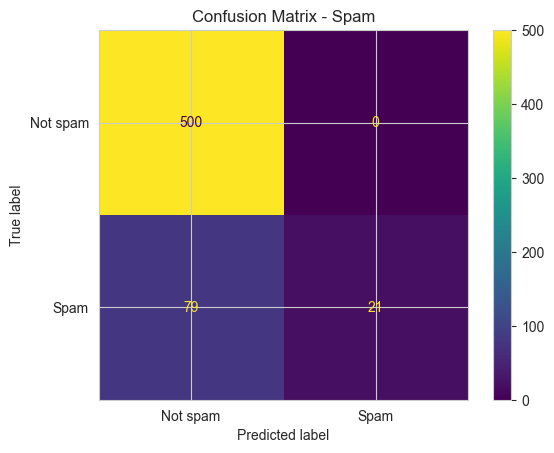

Spam Classification Metrics:
Accuracy: 0.8683
Precision: 0.8863
Recall: 0.8683
F1 Score: 0.8302


In [31]:

# Load spam dataset
spam_texts, spam_labels = load_text_dataset_pandas('spam_or_not_spam.csv')
# same procedure as in 20news groups dataset
# Train-test split
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(spam_texts, spam_labels, test_size=0.2,
                                                                        random_state=42)

# Vectorize data
V_train_spam, V_test_spam = vectorize_text(X_train_spam, X_test_spam)

# Train classifier
clf_spam = MultinomialNB()
clf_spam.fit(V_train_spam, y_train_spam)

# Predict
y_pred_spam = clf_spam.predict(V_test_spam)

# Build confusion matrix
cm_spam = confusion_matrix(y_test_spam, y_pred_spam)
ConfusionMatrixDisplay(cm_spam, display_labels=np.unique(y_test_spam)).plot()
plt.title("Confusion Matrix - Spam")
plt.show()

# Find accuracy, precision, recall, f1-score per class
accuracy_spam = accuracy_score(y_test_spam, y_pred_spam)
precision_spam = precision_score(y_test_spam, y_pred_spam, average='weighted', zero_division=0)
recall_spam = recall_score(y_test_spam, y_pred_spam, average='weighted', zero_division=0)
f1_spam = f1_score(y_test_spam, y_pred_spam, average='weighted', zero_division=0)


# build confusion matrix
# find accuracy, precision, recall, f1-score PER CLASS
print("Spam Classification Metrics:")
print(f"Accuracy: {accuracy_spam:.4f}")
print(f"Precision: {precision_spam:.4f}")
print(f"Recall: {recall_spam:.4f}")
print(f"F1 Score: {f1_spam:.4f}")

## Exercise 4
Apply both a Decision Tree classifier and a Random Forest classifier to the classification problemwe provide you with the datasetadult_sourcedata.csv. The datapoints contain features of anindividual person, and the labels indicate whether or not the person earns more than 50.000$ Usethe OneHotEncoder ofscikit-learnto preprocess the data (what does it do?). Then apply bothDecision Trees and Random Forests, and test which value for the maximum depth of the tree(s)(max_depth) between 1 and 20 works best.   Visualize the evaluation as graph with maximumdepth on one axis and accuracy on the other one. What happens with large values for the maximumdepth? Try the algorithm without specifyingmax_depthand name the 10 most important featuresaccording to gini importance.Hint: Cross-validation might take a while for Random Forest.  If it takes longer than 10 minutes,reduce the number of folds or the number of trees (not less than 10).

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
def load_dataset_withfeatures_pandas(dataset_path):
    """This function loads CSV datasets using the read_csv method of the pandas library.
    The CSV is epxected to be comma-separated, while separate examples are separated by new line.
    All but the last column are expected to be features, the last columns is parsed as output variable."""
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, :-1].to_numpy()
    y = df.iloc[:, -1].to_numpy()

    feature_names = df.iloc[:, :-1].columns.tolist()

    return X, y, feature_names

The One-hot encoder encodes the categorical data in a numerical way. Meaning creating an encoding where 1 represents the class attributed to the given index is active while 0 means inactive. However, I found that the one hot encoder from scipy does not encode the data properly for the Random forest which resulted in the RFs having worse performances than the Decision trees. Thus I did not use the Onehot encoder and encoded the categorical data using the LabelEncoder instead. This presented similiar results for the DT as before while also returning the expected results for the RFs.

In [57]:
def kfold_crossval(classifier, X, y, k=10):
    """Function to evaluate a scikit learn model in 10-fold shuffled
    split cross validation.
    """
    # Perform k-fold cross-validation
    scores = cross_val_score(classifier, X, y, cv=k, scoring='accuracy')

    # Calculate mean and standard deviation of the scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    return mean_score, std_score


Training depth: 1
Training depth: 2
Training depth: 3
Training depth: 4
Training depth: 5
Training depth: 6
Training depth: 7
Training depth: 8
Training depth: 9
Training depth: 10
Training depth: 11
Training depth: 12
Training depth: 13
Training depth: 14
Training depth: 15
Training depth: 16
Training depth: 17
Training depth: 18
Training depth: 19
Training depth: 20


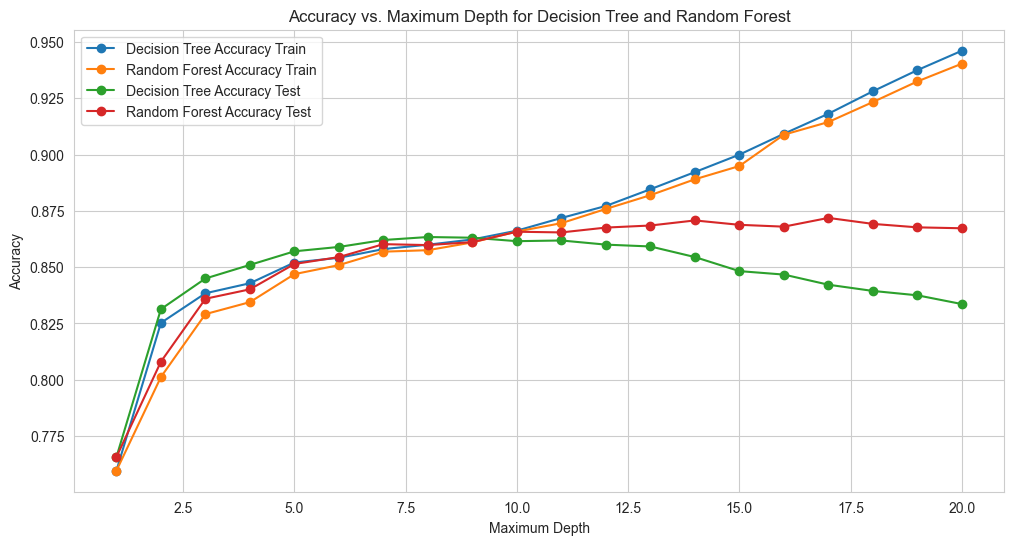

In [93]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"adult_sourcedata.csv")
# Convert numeric columns to appropriate data types
df['age'] = df['age'].astype(int)
df['fnlwgt'] = df['fnlwgt'].astype(int)
df['educational-num'] = df['educational-num'].astype(int)
df['capital-gain'] = df['capital-gain'].astype(int)
df['capital-loss'] = df['capital-loss'].astype(int)
df['hours-per-week'] = df['hours-per-week'].astype(int)

# Encode categorical variables
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                       'race', 'gender', 'native-country', 'income']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split the data into features and labels
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Lists to store accuracies
depths = list(range(1, 21))
dt_accuracies = []
rf_accuracies = []
dt_accuracies_test = []
rf_accuracies_test = []
# Train and evaluate Decision Tree and Random Forest classifiers for each max_depth
for depth in depths:
    # Decision Tree
    print(f"Training depth: {depth}")
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    dt_accuracies.append(accuracy_score(y_train, dt_classifier.predict(X_train)))
    dt_accuracies_test.append(accuracy_score(y_test, dt_classifier.predict(X_test)))

    # Random Forest
    rf_classifier = RandomForestClassifier(max_depth=depth, n_estimators=20, random_state=42)
    rf_classifier.fit(X_train, y_train)
    rf_accuracies.append(accuracy_score(y_train, rf_classifier.predict(X_train)))
    rf_accuracies_test.append(accuracy_score(y_test, rf_classifier.predict(X_test)))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(depths, dt_accuracies, label='Decision Tree Accuracy Train', marker='o')
plt.plot(depths, rf_accuracies, label='Random Forest Accuracy Train', marker='o')
plt.plot(depths, dt_accuracies_test, label='Decision Tree Accuracy Test', marker='o')
plt.plot(depths, rf_accuracies_test, label='Random Forest Accuracy Test', marker='o')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Depth for Decision Tree and Random Forest')
plt.legend()
plt.grid(True)
plt.show()


The above plot shows the change of Accuracy when the maximum depth changes. What can be seen is that the initially the train and test accuracy increases for both RFs and DTs. This is to be expected since deeper trees i.e. more nodes allow the model to build more complex and detailed decision boundaries.

Thus, the increase of the model aids against the early under-fitting of the model. However, as the maximum depth increases the model complexity does as well. Since the model complexity increases the model can adapt more closely to the seen data which results in over-fitting (especially for the DT). This can be seen in the discrepancy of training and validation performance. The Accuracy continuously grows with deeper trees, however the validation performance stagnates.


Additionally, the plot shows that even though they might have unnecessary parameters the RFs test performance does not decrease with deeper trees. The same can not be said for the DT. This is likely due to the random bagging in the RF. In contrast, at one point the DT has so much parameters that it only learns the training data by heart and does not generalize i.e. the test performance decreases if the tree is too deep.

In [121]:
# Train Random Forest without specifying max_depth
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest Accuracy without max_depth:", kfold_crossval(rf_classifier, X_test, y_test))

Random Forest Accuracy without max_depth: (0.8634470904575734, 0.011566027046830869)


In [100]:
# Identify the 10 most important features
feature_importances = rf_classifier.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print("Top 10 important features according to Gini importance:")
print(important_features.head(10))

Top 10 important features according to Gini importance:
fnlwgt             0.176228
age                0.153135
capital-gain       0.110221
relationship       0.101553
educational-num    0.086559
hours-per-week     0.083153
marital-status     0.071185
occupation         0.065999
workclass          0.039186
capital-loss       0.037120
dtype: float64


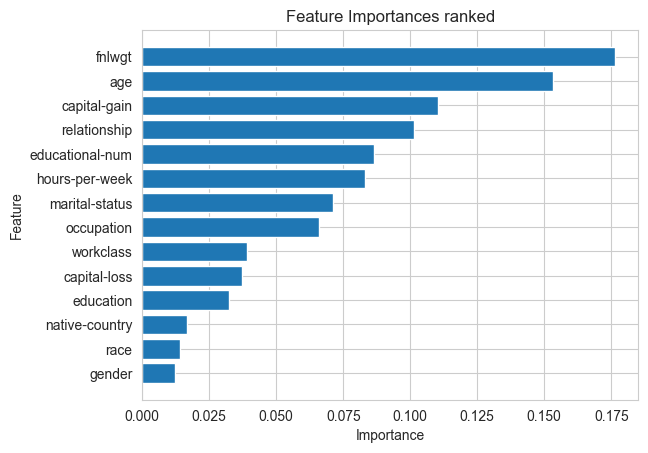

In [120]:
sorted_pairs = sorted(zip(feature_importances, X.columns))
sorted_values, sorted_labels = zip(*sorted_pairs)

plt.barh(np.arange(len(sorted_values)), sorted_values)
plt.yticks(range(len(sorted_labels)), sorted_labels)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.title("Feature Importances ranked")
plt.show()